In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [22]:
df = pd.read_csv('../extracted_data/obesity_level.csv')

In [23]:
df.sample()

,Unnamed: 0,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level,BMI,Water_Intake_Per_Kg
13896,13896,13896,Male,26.0,1.8,86.0,0,1,3.0,3.0,Sometimes,0,2.0,0,2.0,1.0,0,Automobile,Overweight_Level_I,26.54321,0.023256


In [4]:
df = df.rename(columns={'0be1dad': 'Obesity_Level'})

In [6]:
df['Obesity_Level'].value_counts()

Obesity_Level
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [26]:
df.drop(['BMI'], axis=1, inplace=True)

In [28]:
df.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level
0,0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
df.to_csv('../extracted_data/obesity_level.csv', index=False)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
encoder = OneHotEncoder(sparse=False, drop="first")
features = ["CAEC", "CALC", "MTRANS"]
df_encoding = df.copy()
encoded_df = pd.DataFrame(
    encoder.fit_transform(df[features]),
    columns=encoder.get_feature_names_out(features),
)
df_encoding = df_encoding.drop(columns=features).reset_index(drop=True)
df_encoding = pd.concat([df_encoding, encoded_df], axis=1)

c:\Users\Richie\anaconda3\envs\obesity_risk\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
df.describe()

,Unnamed: 0,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,BMI,Water_Intake_Per_Kg
count,20758.00000,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756,30.241842,0.024716
std,5992.46278,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113,8.333932,0.009414
min,0.00000,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.868541,0.006442
25%,5189.25000,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000,24.088223,0.018182
50%,10378.50000,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887,29.384757,0.023663
75%,15567.75000,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000,37.011168,0.029851
max,20757.00000,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000,54.997991,0.072780


<Axes: xlabel='BMI', ylabel='Count'>

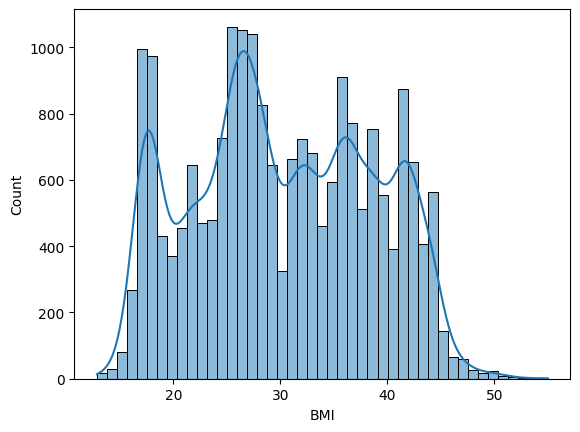

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['BMI'], kde=True)

In [30]:
import pickle

file_path = '../saved_models/XGB_trained_model.pkl'

with open(file_path, 'rb') as file:
    model = pickle.load(file)


In [32]:
input_data = [[1, 3.23, -0.002828, 0.693147, 0.693147, -0.836279, 1.382110, 0.0, 1.206594, 0.0, -1.171141, 0.597438, -0.237862,  0.033838, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]]

In [33]:
model.predict(input_data)

AttributeError: 'ModelTrainer' object has no attribute 'predict'

In [52]:
import pickle

# Load the saved ModelTrainer object
model_path = "../saved_models/XGB_trained_model.pkl"
with open(model_path, 'rb') as f:
    trained_model = pickle.load(f)


# Prepare your input data for prediction
input_data = [[1, 3.23, -0.002828, 0.693147, 0.693147, -0.836279, 1.382110, 0.0, 1.206594, 0.0, -1.171141, 0.597438, -0.00237862,  0.033838, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]]

# Make predictions using the trained model
predictions = trained_model.predict(input_data)

print(predictions)

[6]


In [50]:
print(dir(loaded_model_trainer))

['_Booster', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_is_fitted__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_can_use_inplace_predict', '_check_feature_names', '_check_n_features', '_configure_fit', '_create_dmatrix', '_estimator_type', '_get_default_requests', '_get_iteration_range', '_get_metadata_request', '_get_param_names', '_get_tags', '_get_type', '_load_model_attributes', '_mlflow_run_id', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_evaluation_result', '_validate_data', '_validate_params', 'apply', 'base_score', 'best_iteration', 'best_score', 'booster', 'callbacks', 'classes_', 'coef_', 'colsa

In [46]:
model=pickle.load(open('../saved_models/XGB_trained_model.pkl','rb'))

In [47]:
input_data = [[1, 3.23, -0.002828, 0.693147, 0.693147, -0.836279, 1.382110, 0.0, 1.206594, 0.0, -1.171141, 0.597438, -0.00237862,  0.033838, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]]

In [45]:
model.predict(input_data)

AttributeError: 'ModelTrainer' object has no attribute 'predict'